In [1]:
#given the traffic volume data with the dates, holidays, weather information
#we will find out whether there are any correlation between these information 
#be it the holiday or weather condition with the traffic volume 

import pandas as pd # the pd is by convention

import numpy as np # as is the np

 

import matplotlib.pyplot as plt

import seaborn as sns

 

# To Plot matplotlib figures inline on the notebook

%matplotlib inline

plt.style.use('bmh')

import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
%matplotlib notebook
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
import scipy.stats as sps
sns.set(style='whitegrid')

In [2]:
customer = pd.read_csv('customer.csv')

customer.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [3]:
payment = pd.read_csv('payment.csv')

payment.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


In [6]:
combine_data=pd.merge(customer,payment,how='left')
combine_data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,18,10,NaN,28/04/2009,153792.0,149387.0,10/08/2015
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,1,5,NaN,30/03/2009,0.0,150500.0,NaN
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,2,26,11906,6,10,NaN,17/05/2007,0.0,46371.0,12/07/2013
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0,19/04/2016


In [7]:
combine_data.tail()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
8245,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,10,13,NaN,06/04/2010,0.0,35500.0,06/03/2011
8246,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,1,10,NaN,27/04/2008,-121.2,601.0,NaN
8247,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,12,2,NaN,01/12/2015,334130.4,2400500.0,12/01/2015
8248,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,7,1,NaN,18/07/2015,456098.4,406938.0,22/12/2015
8249,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,33,10,NaN,17/05/2013,8391.6,36149.0,16/01/2016


In [8]:
combine_data.dtypes

label                int64
id                   int64
fea_1                int64
fea_2              float64
fea_3                int64
fea_4              float64
fea_5                int64
fea_6                int64
fea_7                int64
fea_8                int64
fea_9                int64
fea_10               int64
fea_11             float64
OVD_t1               int64
OVD_t2               int64
OVD_t3               int64
OVD_sum              int64
pay_normal           int64
prod_code            int64
prod_limit         float64
update_date         object
new_balance        float64
highest_balance    float64
report_date         object
dtype: object

In [9]:
combine_data["OVD_sum"].describe()

count     8250.000000
mean       187.681697
std       1804.232570
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      31500.000000
Name: OVD_sum, dtype: float64

In [10]:
combine_data["pay_normal"].describe()

count    8250.000000
mean       14.526667
std        12.053627
min         0.000000
25%         4.000000
50%        11.000000
75%        25.000000
max        36.000000
Name: pay_normal, dtype: float64

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
combine_data.apply(lambda x: sum(x.isnull()/len(combine_data)))

label              0.000000
id                 0.000000
fea_1              0.000000
fea_2              0.124606
fea_3              0.000000
fea_4              0.000000
fea_5              0.000000
fea_6              0.000000
fea_7              0.000000
fea_8              0.000000
fea_9              0.000000
fea_10             0.000000
fea_11             0.000000
OVD_t1             0.000000
OVD_t2             0.000000
OVD_t3             0.000000
OVD_sum            0.000000
pay_normal         0.000000
prod_code          0.000000
prod_limit         0.741576
update_date        0.003152
new_balance        0.000000
highest_balance    0.049576
report_date        0.135030
dtype: float64

In [20]:
combine_data_clean = combine_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
combine_data_clean.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,18,10,55000.0,28/04/2009,153792.0,149387.0,10/08/2015
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,1,5,55000.0,30/03/2009,0.0,150500.0,21/09/2015
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,2,26,11906,6,10,55000.0,17/05/2007,0.0,46371.0,12/07/2013
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,4,6,55000.0,02/06/2016,15120.0,21500.0,19/04/2016


In [95]:
#cols_to_drop = 'report_date'
#combine_data_clean = combine_data_clean.drop([cols_to_drop], axis=1)




KeyError: "['report_date'] not found in axis"

In [48]:
cols_to_drop = 'update_date'
combine_data_clean = combine_data_clean.drop([cols_to_drop], axis=1)


KeyError: "['update_date'] not found in axis"

In [96]:
x = combine_data_clean.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
combine_data_clean = pd.DataFrame(x_scaled,columns=combine_data_clean.columns)

In [97]:
combine_data.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
count,8250.000000,8.250000e+03,8250.000000,7222.000000,8250.000000,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,...,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,2132.000000,8.250000e+03,7.841000e+03
mean,0.168121,5.782173e+07,5.522667,1286.156813,2.319636,1.386712e+05,1.940848,11.013939,4.881091,100.026303,...,153.030672,0.249091,0.127152,0.369212,187.681697,14.526667,8.232000,85789.702205,1.054042e+05,2.192027e+05
std,0.373997,1.822724e+06,1.388358,52.002429,0.887414,1.081565e+05,0.235922,2.694611,3.031902,12.540081,...,122.082517,1.250197,0.860046,2.900320,1804.232570,12.053627,3.533055,74345.828184,1.887704e+06,2.814536e+06
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,-4.030320e+04,5.010000e+02
25%,0.000000,5.499050e+07,4.000000,1248.500000,1.000000,7.700000e+04,2.000000,8.000000,5.000000,90.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,37400.000000,0.000000e+00,2.345300e+04
50%,0.000000,5.898905e+07,5.000000,1283.000000,3.000000,1.110000e+05,2.000000,11.000000,5.000000,105.000000,...,184.724119,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,68200.000000,0.000000e+00,4.404700e+04
75%,0.000000,5.899655e+07,7.000000,1317.500000,3.000000,1.510000e+05,2.000000,12.000000,5.000000,110.000000,...,220.227156,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,112200.000000,2.494800e+04,1.005000e+05
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,...,707.106781,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,660000.000000,1.632120e+08,1.800005e+08


In [31]:
combine_data.median()

label              0.000000e+00
id                 5.898905e+07
fea_1              5.000000e+00
fea_2              1.283000e+03
fea_3              3.000000e+00
fea_4              1.110000e+05
fea_5              2.000000e+00
fea_6              1.100000e+01
fea_7              5.000000e+00
fea_8              1.050000e+02
fea_9              5.000000e+00
fea_10             7.200000e+04
fea_11             1.847241e+02
OVD_t1             0.000000e+00
OVD_t2             0.000000e+00
OVD_t3             0.000000e+00
OVD_sum            0.000000e+00
pay_normal         1.100000e+01
prod_code          1.000000e+01
prod_limit         6.820000e+04
new_balance        0.000000e+00
highest_balance    4.404700e+04
dtype: float64

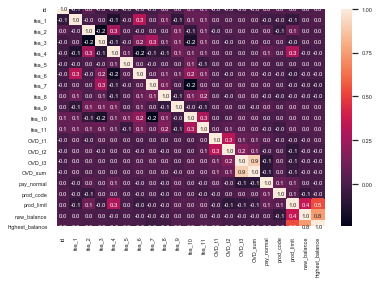

In [36]:
sns.set()
sns.set(font_scale=0.5)
sns.heatmap(combine_data[combine_data.columns[1:]].corr(),annot=True,fmt=".1f")
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [100]:
X = combine_data.drop(['OVD_sum','prod_limit','new_balance','highest_balance'], axis=1)
y = combine_data.OVD_sum

#'report_date', 'update_date' ,'fea2','fea4','fea11'


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [102]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [103]:
#combine_data.drop(['report_date', 'update_date'], axis=1) 

  
knMod.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [90]:
knMod.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [59]:
combine_data.tail()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
8245,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,1.000000,0,0,0,0,10,13,NaN,0.0,35500.0
8246,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,1.000000,0,0,0,0,1,10,NaN,-121.2,601.0
8247,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,273.861279,0,0,0,0,12,2,NaN,334130.4,2400500.0
8248,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,273.861279,0,0,0,0,7,1,NaN,456098.4,406938.0
8249,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,273.861279,0,0,0,0,33,10,NaN,8391.6,36149.0


In [62]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [91]:

rfMod.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [92]:
knMod.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [74]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [75]:
rescaledX = scaler.transform(X)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [77]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Fitting logistic regression with default parameter values
logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [78]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Using the trained model to predict instances from the test set
y_pred = logreg.predict(rescaledX_test)

# Getting the accuracy score of predictive model
print("Logistic regression classifier has accuracy of: ", logreg.score(rescaledX_test, Y_test))

# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

NotFittedError: This LogisticRegression instance is not fitted yet

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in combine_data:
    if combine_data[col].dtypes=='object':
        combine_data[col]=le.fit_transform(combine_data[col])

In [94]:
combine_data.tail(15)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
8235,0,58995381,7,1220.0,3,76000.0,2,11,2,90,...,1.000000,0,0,0,0,24,13,NaN,0.0,42500.0
8236,0,58995381,7,1220.0,3,76000.0,2,11,2,90,...,1.000000,1,0,0,4,22,10,NaN,14793.6,81160.0
8237,0,58995381,7,1220.0,3,76000.0,2,11,2,90,...,1.000000,5,2,0,231,9,1,NaN,0.0,39444.0
8238,0,58995381,7,1220.0,3,76000.0,2,11,2,90,...,1.000000,1,1,2,297,7,10,NaN,0.0,12622.0
8239,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,1.000000,0,0,0,0,15,10,15400.0,0.0,7375.0
8240,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,1.000000,1,0,0,1,35,10,123750.0,9606.0,55752.0
8241,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,1.000000,0,0,0,0,35,1,NaN,158676.0,430500.0
8242,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,1.000000,0,0,0,0,35,5,NaN,0.0,200500.0
8243,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,1.000000,0,0,0,0,36,10,NaN,2430.0,39032.0
8244,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,1.000000,0,0,0,0,34,5,NaN,0.0,250500.0


In [99]:
knMod.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [104]:
combine_data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,244.948974,0,0,0,0,9,10,60500.0,6657.6,18934.0
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,244.948974,0,0,0,0,18,10,NaN,153792.0,149387.0
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,244.948974,0,0,0,0,1,5,NaN,0.0,150500.0
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,244.948974,0,2,26,11906,6,10,NaN,0.0,46371.0
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,207.173840,0,0,0,0,4,6,NaN,15120.0,21500.0


In [120]:
combine_data=combine_data.drop(['prod_limit'], axis=1)
combine_data.head()

KeyError: "['prod_limit'] not found in axis"

In [115]:
knMod.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [117]:
combine_data.tail(20)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_10,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,new_balance,highest_balance
8230,0,58987926,5,NaN,2,50000.0,2,15,5,108,...,450000,169.000000,0,0,0,0,30,13,0.0,24320.0
8231,0,58995381,7,1220.0,3,76000.0,2,11,2,90,...,71002,1.000000,0,0,0,0,1,5,180000.0,150500.0
8232,0,58995381,7,1220.0,3,76000.0,2,11,2,90,...,71002,1.000000,0,0,0,0,5,1,427122.0,375500.0
8233,0,58995381,7,1220.0,3,76000.0,2,11,2,90,...,71002,1.000000,0,0,0,0,8,6,10760.4,27401.0
8234,0,58995381,7,1220.0,3,76000.0,2,11,2,90,...,71002,1.000000,1,2,0,149,14,6,-1.2,23490.0
8235,0,58995381,7,1220.0,3,76000.0,2,11,2,90,...,71002,1.000000,0,0,0,0,24,13,0.0,42500.0
8236,0,58995381,7,1220.0,3,76000.0,2,11,2,90,...,71002,1.000000,1,0,0,4,22,10,14793.6,81160.0
8237,0,58995381,7,1220.0,3,76000.0,2,11,2,90,...,71002,1.000000,5,2,0,231,9,1,0.0,39444.0
8238,0,58995381,7,1220.0,3,76000.0,2,11,2,90,...,71002,1.000000,1,1,2,297,7,10,0.0,12622.0
8239,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,72000,1.000000,0,0,0,0,15,10,0.0,7375.0


In [121]:
combine_data=combine_data.drop(['fea_2'], axis=1)
combine_data.head()

,label,id,fea_1,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,new_balance,highest_balance
0,1,54982665,5,3,77000.0,2,15,5,109,5,151300,244.948974,0,0,0,0,9,10,6657.6,18934.0
1,1,54982665,5,3,77000.0,2,15,5,109,5,151300,244.948974,0,0,0,0,18,10,153792.0,149387.0
2,1,54982665,5,3,77000.0,2,15,5,109,5,151300,244.948974,0,0,0,0,1,5,0.0,150500.0
3,1,54982665,5,3,77000.0,2,15,5,109,5,151300,244.948974,0,2,26,11906,6,10,0.0,46371.0
4,0,59004779,4,1,113000.0,2,8,-1,100,3,341759,207.173840,0,0,0,0,4,6,15120.0,21500.0


In [122]:
knMod.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [254]:
combine_data.tail()

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
8245,58998054,4,1250.0,3,137000.0,2,8,5,90,5,...,0,0,0,10,13,NaN,06/04/2010,0.0,35500.0,06/03/2011
8246,58998054,4,1250.0,3,137000.0,2,8,5,90,5,...,0,0,0,1,10,NaN,27/04/2008,-121.2,601.0,NaN
8247,54989781,4,1415.0,3,93000.0,2,8,5,113,4,...,0,0,0,12,2,NaN,01/12/2015,334130.4,2400500.0,12/01/2015
8248,54989781,4,1415.0,3,93000.0,2,8,5,113,4,...,0,0,0,7,1,NaN,18/07/2015,456098.4,406938.0,22/12/2015
8249,54989781,4,1415.0,3,93000.0,2,8,5,113,4,...,0,0,0,33,10,NaN,17/05/2013,8391.6,36149.0,16/01/2016


In [124]:
combine_data=combine_data.drop(['highest_balance'], axis=1)
combine_data.head()

,label,id,fea_1,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,new_balance
0,1,54982665,5,3,77000.0,2,15,5,109,5,151300,244.948974,0,0,0,0,9,10,6657.6
1,1,54982665,5,3,77000.0,2,15,5,109,5,151300,244.948974,0,0,0,0,18,10,153792.0
2,1,54982665,5,3,77000.0,2,15,5,109,5,151300,244.948974,0,0,0,0,1,5,0.0
3,1,54982665,5,3,77000.0,2,15,5,109,5,151300,244.948974,0,2,26,11906,6,10,0.0
4,0,59004779,4,1,113000.0,2,8,-1,100,3,341759,207.173840,0,0,0,0,4,6,15120.0


In [125]:
knMod.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [253]:
combine_data.tail()

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
8245,58998054,4,1250.0,3,137000.0,2,8,5,90,5,...,0,0,0,10,13,NaN,06/04/2010,0.0,35500.0,06/03/2011
8246,58998054,4,1250.0,3,137000.0,2,8,5,90,5,...,0,0,0,1,10,NaN,27/04/2008,-121.2,601.0,NaN
8247,54989781,4,1415.0,3,93000.0,2,8,5,113,4,...,0,0,0,12,2,NaN,01/12/2015,334130.4,2400500.0,12/01/2015
8248,54989781,4,1415.0,3,93000.0,2,8,5,113,4,...,0,0,0,7,1,NaN,18/07/2015,456098.4,406938.0,22/12/2015
8249,54989781,4,1415.0,3,93000.0,2,8,5,113,4,...,0,0,0,33,10,NaN,17/05/2013,8391.6,36149.0,16/01/2016


In [129]:
combine_data=combine_data.drop(['fea_4'], axis=1)
combine_data.head()

,label,id,fea_1,fea_3,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,new_balance
0,1,54982665,5,3,2,15,5,109,5,151300,244.948974,0,0,0,0,9,10,6657.6
1,1,54982665,5,3,2,15,5,109,5,151300,244.948974,0,0,0,0,18,10,153792.0
2,1,54982665,5,3,2,15,5,109,5,151300,244.948974,0,0,0,0,1,5,0.0
3,1,54982665,5,3,2,15,5,109,5,151300,244.948974,0,2,26,11906,6,10,0.0
4,0,59004779,4,1,2,8,-1,100,3,341759,207.173840,0,0,0,0,4,6,15120.0


In [133]:
#
#fea_11             float64
#new_balance        float64
#highest_balance    float64

combine_data=combine_data.drop(['fea_11'], axis=1)

combine_data.head()

KeyError: "['fea_11'] not found in axis"

In [132]:
combine_data=combine_data.drop(['new_balance'], axis=1)

combine_data.head()

KeyError: "['new_balance'] not found in axis"

In [134]:
combine_data.head()

,label,id,fea_1,fea_3,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code
0,1,54982665,5,3,2,15,5,109,5,151300,0,0,0,0,9,10
1,1,54982665,5,3,2,15,5,109,5,151300,0,0,0,0,18,10
2,1,54982665,5,3,2,15,5,109,5,151300,0,0,0,0,1,5
3,1,54982665,5,3,2,15,5,109,5,151300,0,2,26,11906,6,10
4,0,59004779,4,1,2,8,-1,100,3,341759,0,0,0,0,4,6


In [135]:
knMod.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [261]:
combine_data.head()

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,54982665,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,18,10,NaN,28/04/2009,153792.0,149387.0,10/08/2015
2,54982665,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,1,5,NaN,30/03/2009,0.0,150500.0,NaN
3,54982665,5,1245.5,3,77000.0,2,15,5,109,5,...,2,26,11906,6,10,NaN,17/05/2007,0.0,46371.0,12/07/2013
4,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,...,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0,19/04/2016


In [137]:
combine_data.dtypes

label         int64
id            int64
fea_1         int64
fea_3         int64
fea_5         int64
fea_6         int64
fea_7         int64
fea_8         int64
fea_9         int64
fea_10        int64
OVD_t1        int64
OVD_t2        int64
OVD_t3        int64
OVD_sum       int64
pay_normal    int64
prod_code     int64
dtype: object

In [262]:
combine_data.tail()

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
8245,58998054,4,1250.0,3,137000.0,2,8,5,90,5,...,0,0,0,10,13,NaN,06/04/2010,0.0,35500.0,06/03/2011
8246,58998054,4,1250.0,3,137000.0,2,8,5,90,5,...,0,0,0,1,10,NaN,27/04/2008,-121.2,601.0,NaN
8247,54989781,4,1415.0,3,93000.0,2,8,5,113,4,...,0,0,0,12,2,NaN,01/12/2015,334130.4,2400500.0,12/01/2015
8248,54989781,4,1415.0,3,93000.0,2,8,5,113,4,...,0,0,0,7,1,NaN,18/07/2015,456098.4,406938.0,22/12/2015
8249,54989781,4,1415.0,3,93000.0,2,8,5,113,4,...,0,0,0,33,10,NaN,17/05/2013,8391.6,36149.0,16/01/2016


In [139]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

In [140]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [141]:
rescaledX = scaler.transform(X)

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [145]:
# Build base line model -- Drop NA's
pip_baseline = make_pipeline(RobustScaler(), rf_clf)

# Build random forest classifier
rf_clf = RandomForestClassifier(n_estimators=500, max_features=0.25,
                                criterion="entropy", class_weight="balanced")
# fit RF to plot feature importances
rf_clf.fit(RobustScaler().fit_transform(
  Imputer(strategy="median").fit_transform(X_train)), y_train)

# Plot features importance
importances = rf_clf.feature_importances_
indices = np.argsort(rf_clf.feature_importances_)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, 25), importances[indices], align="center")
plt.xticks(range(1, 25),
           df.columns[df.columns != "not_fully_paid"][indices],
           rotation=90)
plt.title("Feature Importance", {"fontsize": 16});

NameError: name 'make_pipeline' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic=['Credit_History','Education','Gender']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values

x_test=test_modified[list(predictors_Logistic)].values

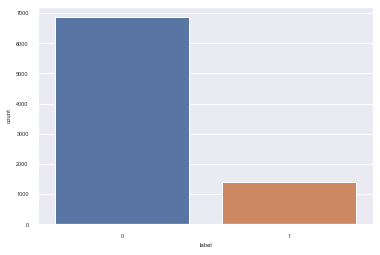

In [147]:

sns.countplot(data = combine_data, x = 'label')

In [235]:
knMod.fit(X_train, y_train)

ValueError: could not convert string to float: '12/08/2015'

In [149]:
X = combine_data.drop(['label'], axis=1)
y = combine_data.label

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [151]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [152]:
knMod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [153]:
knMod.score(X_test, y_test)

0.9442559379544353

In [154]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [155]:
rescaledX = scaler.transform(X)

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, y_test))
# Evaluate the confusion_matrix
confusion_matrix(y_test, y_pred)

Random Forest classifier has accuracy of:  0.941832283082889


array([[1736,    1],
       [ 119,  207]], dtype=int64)

Feature ranking:
1. feature 0 (0.225993)
2. feature 8 (0.196446)
3. feature 6 (0.172748)
4. feature 13 (0.088517)
5. feature 14 (0.055276)
6. feature 5 (0.051926)
7. feature 7 (0.048821)
8. feature 2 (0.038099)
9. feature 4 (0.031074)
10. feature 12 (0.027273)
11. feature 1 (0.023797)
12. feature 9 (0.013935)
13. feature 3 (0.010607)
14. feature 10 (0.008416)
15. feature 11 (0.007071)


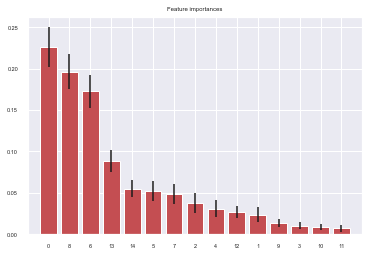

In [159]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

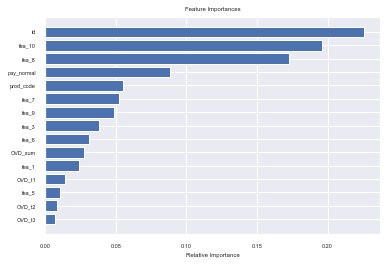

In [160]:
# copy of CC_data is in CC_data2
combine_data = combine_data.drop(['label'], axis=1)

features = combine_data.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [161]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Fitting logistic regression with default parameter values
logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Using the trained model to predict instances from the test set
y_pred = logreg.predict(rescaledX_test)

# Getting the accuracy score of predictive model
print("Logistic regression classifier has accuracy of: ", logreg.score(rescaledX_test, y_test))

# Evaluate the confusion_matrix
confusion_matrix(y_test, y_pred)

Logistic regression classifier has accuracy of:  0.842462433349491


array([[1736,    1],
       [ 324,    2]], dtype=int64)

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, confusion_matrix, accuracy_score

logistic_regression = LogisticRegression(n_jobs=-1,random_state=15)
logistic_regression.fit(rescaledX_train, y_train)

y_pred_proba=logistic_regression.predict_proba(rescaledX_test)[:,1]
y_pred_test = (y_pred_proba >=0.2).astype('int')


#confusion matrix

#CM=confusion_matrix(y_pred=y_pred_test, y_true=y_test)
#print("Recall:", 100*recall_score(y_pred=y_pred_test,y_true=y_test))
#print("Precision:", 100*precision_score(y_pred=y_pred_test,y_true=y_test))

CM=confusion_matrix(y_pred_test, y_test)
print("Recall:", 100*recall_score(y_pred_test,y_test))
print("Precision:", 100*precision_score(y_pred_test,y_test))
print(CM)

Recall: 0.0
Precision: 0.0
[[1703  358]
 [   2    0]]


In [165]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary
param_grid = dict(tol=tol, max_iter=max_iter)


# Initializing GridSearchCV
grid_model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Rescaling the entire data set with all the predictive features
rescaledX = scaler.fit_transform(X)

# Calculating and summarizing the final results
grid_model_result = grid_model.fit(rescaledX, y)
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_ 
print("Best: %f using %s" %  (best_score, best_params))

Best: 0.831636 using {'max_iter': 100, 'tol': 0.01}


In [247]:
from sklearn.preprocessing import RobustScaler



def make_pred(new_data):
    data = new_data.values.reshape(1,-1)
    data = robust_scaler.transform(data)
    prob = logistic_regression.predict_proba(data)(0)[1]
    if prob >=0.2:
        return 'Will default'
    else:
        return 'Will pay'

In [248]:
pay = pay[pay['label']==0]

In [249]:
pay.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,207.17384,0,0,0,0,4,6,NaN,15120.0,21500.0
5,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,207.17384,0,0,0,0,5,6,NaN,5596.8,14500.0
6,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,207.17384,0,0,0,0,5,10,40700.0,8257.2,13119.0
7,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,207.17384,0,0,0,0,12,6,NaN,0.0,66701.0
8,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,207.17384,0,0,0,0,28,10,129800.0,1633.2,29993.0


In [255]:
from sklearn.preprocessing import RobustScaler


#robust_scaler=RobustScaler()

#X=robust_scaler.fit_transform(X)


from collections import OrderedDict
new_customer = OrderedDict([('fea_1',1),('fea_2',1000),
                            ('fea_3',1),('fea_4',50000),
                            ('fea_5',1),('fea_6',8),
                            ('fea_7',5), ('fea_8',100),
                            ('fea_9',1),('fea_10',70000),
                            ('fea_11',1),('OVD_t1',0),
                            ('OVD_t2',0), ('OVD_t3',0),
                            ('OVD_sum',0), ('pay_normal',0),
                            ('prod_code',5),
                            ('prod_limit',4000),('new_balance',3000),
                            ('highest_balance',1000)])
new_customer = pd.Series(new_customer)
make_pred(new_customer)

for x in negative.index[0:100]:
    print(make_pred(negative.loc[x].drop('label')))

NotFittedError: scale_

In [209]:
combine_data.head()

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,54982665,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,18,10,NaN,28/04/2009,153792.0,149387.0,10/08/2015
2,54982665,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,1,5,NaN,30/03/2009,0.0,150500.0,NaN
3,54982665,5,1245.5,3,77000.0,2,15,5,109,5,...,2,26,11906,6,10,NaN,17/05/2007,0.0,46371.0,12/07/2013
4,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,...,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0,19/04/2016


In [215]:
pay.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0,19/04/2016
5,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,5,6,NaN,17/12/2015,5596.8,14500.0,19/04/2016
6,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,5,10,40700.0,20/11/2015,8257.2,13119.0,19/03/2016
7,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,12,6,NaN,27/12/2014,0.0,66701.0,18/09/2015
8,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,28,10,129800.0,02/10/2014,1633.2,29993.0,23/04/2016


In [227]:
pay.drop('report_date',axis=1)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0
5,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,5,6,NaN,17/12/2015,5596.8,14500.0
6,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,5,10,40700.0,20/11/2015,8257.2,13119.0
7,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,12,6,NaN,27/12/2014,0.0,66701.0
8,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,28,10,129800.0,02/10/2014,1633.2,29993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,0,10,13,NaN,06/04/2010,0.0,35500.0
8246,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,0,1,10,NaN,27/04/2008,-121.2,601.0
8247,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,0,12,2,NaN,01/12/2015,334130.4,2400500.0
8248,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,0,7,1,NaN,18/07/2015,456098.4,406938.0


In [223]:
pay.drop('update_date',axis=1)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance,report_date
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,4,6,NaN,15120.0,21500.0,19/04/2016
5,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,5,6,NaN,5596.8,14500.0,19/04/2016
6,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,5,10,40700.0,8257.2,13119.0,19/03/2016
7,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,12,6,NaN,0.0,66701.0,18/09/2015
8,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,28,10,129800.0,1633.2,29993.0,23/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,0,10,13,NaN,0.0,35500.0,06/03/2011
8246,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,0,1,10,NaN,-121.2,601.0,NaN
8247,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,0,12,2,NaN,334130.4,2400500.0,12/01/2015
8248,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,0,7,1,NaN,456098.4,406938.0,22/12/2015


KeyError: "['label'] not found in axis"

In [243]:
pay.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0,19/04/2016
5,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,5,6,NaN,17/12/2015,5596.8,14500.0,19/04/2016
6,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,5,10,40700.0,20/11/2015,8257.2,13119.0,19/03/2016
7,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,12,6,NaN,27/12/2014,0.0,66701.0,18/09/2015
8,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,28,10,129800.0,02/10/2014,1633.2,29993.0,23/04/2016


In [244]:
pay=pay.drop(['update_date'], axis=1)
pay.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance,report_date
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,4,6,NaN,15120.0,21500.0,19/04/2016
5,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,5,6,NaN,5596.8,14500.0,19/04/2016
6,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,5,10,40700.0,8257.2,13119.0,19/03/2016
7,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,12,6,NaN,0.0,66701.0,18/09/2015
8,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,28,10,129800.0,1633.2,29993.0,23/04/2016


In [245]:
pay=pay.drop(['report_date'], axis=1)
pay.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,207.17384,0,0,0,0,4,6,NaN,15120.0,21500.0
5,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,207.17384,0,0,0,0,5,6,NaN,5596.8,14500.0
6,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,207.17384,0,0,0,0,5,10,40700.0,8257.2,13119.0
7,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,207.17384,0,0,0,0,12,6,NaN,0.0,66701.0
8,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,207.17384,0,0,0,0,28,10,129800.0,1633.2,29993.0


In [266]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(n_jobs=-1,random_state=15)
logistic_regression.fit(X_train, y_train)

y_pred_proba=logistic_regression.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >=0.2).astype('int')

#confusion matrix

CM=confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("Recall:", 100*recall_score(y_pred=y_pred_test,y_true=y_test))
print("Precision:", 100*precision_score(y_pred=y_pred_test,y_true=y_test))
CMatrix(CM)

ValueError: could not convert string to float: '19/12/2015'